In [350]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [351]:
# Import Customer data
customer_data = pd.read_csv(r'QVI_purchase_behaviour.csv')
customer_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [352]:
customer_data.shape

(72637, 3)

Customer data has 72637 rows and 3 columns

In [353]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


### DATA CLEANING AND PREPARATION

In [354]:
customer_data['LIFESTAGE'] = customer_data['LIFESTAGE'].astype(str)
customer_data['PREMIUM_CUSTOMER'] = customer_data['PREMIUM_CUSTOMER'].astype(str)


In [355]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [356]:
# check for Missing Values
null_values = customer_data.isnull().sum()
null_values

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

We have no Missing values in this dataset.

In [357]:
# Check for duplicates
duplicate_count = customer_data.duplicated().sum()
duplicate_count

0

No duplicates.

In [358]:
# Summary Stats
customer_data.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


### EXPLORATORY DATA ANALYSIS

In [359]:
# Unique Lifestage
lifestage = customer_data['LIFESTAGE'].unique()
lifestage

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

This initial EDA step identified the seven unique customer lifestage categories within our dataset.

Let’s have a closer look at the **LIFESTAGE** and **PREMIUM_CUSTOMER** columns.


In [360]:
customer_data['LIFESTAGE'].value_counts()

LIFESTAGE
RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: count, dtype: int64

---
**Lifestage Distribution**

Following the identification of unique lifestages, we analyzed the **distribution of customers across these categories**. This provides a quantitative understanding of the customer base composition.

The breakdown is as follows:

* **RETIREES**: 14,805 customers
* **OLDER SINGLES/COUPLES**: 14,609 customers
* **YOUNG SINGLES/COUPLES**: 14,441 customers
* **OLDER FAMILIES**: 9,780 customers
* **YOUNG FAMILIES**: 9,178 customers
* **MIDAGE SINGLES/COUPLES**: 7,275 customers
* **NEW FAMILIES**: 2,549 customers

This distribution highlights the most prevalent lifestage segments within our customer data, informing where to focus initial strategic efforts.

In [361]:
customer_data['PREMIUM_CUSTOMER'].value_counts()

PREMIUM_CUSTOMER
Mainstream    29245
Budget        24470
Premium       18922
Name: count, dtype: int64

---
**Premium Customer Segment Distribution**

This analysis details the **distribution of customers across different premium segments**. Understanding these segments is vital for targeted marketing and product strategies.

The customer breakdown is as follows:

* **Mainstream**: 29,245 customers
* **Budget**: 24,470 customers
* **Premium**: 18,922 customers

This distribution provides insight into the relative sizes of our customer segments based on their premium status, indicating a significant portion of our customer base falls into the 'Mainstream' category.

In [362]:
# Import Transaction data
transaction_data = pd.read_excel(r'QVI_transaction_data.xlsx')
transaction_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [363]:
transaction_data.shape

(264836, 8)

Transaction data has 264836 rows and 8 columns.

In [364]:
transaction_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


### DATA CLEANING AND PREPARATION

In [365]:
# Change date to proper date format
transaction_data["DATE"] = pd.to_datetime(transaction_data["DATE"], origin='1899-12-30', unit='D')
# Confirm the changes 
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [366]:
# Check for Missing Values
transaction_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Transaction data has no Missing values.

In [367]:
# Check for duplicates
duplicate = transaction_data.duplicated().sum()
duplicate

1

Transaction data has one duplicate.

In [368]:
# Displaying the duplicated row
duplicates = transaction_data[transaction_data.duplicated()]
duplicates

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [369]:
# Drop the duplicate
transaction_data = transaction_data.drop_duplicates()

In [370]:
# Confirm the change was effective
duplicate = transaction_data.duplicated().sum()
duplicate

0

### EXPLORATORY DATA ANALYSIS

Checking that we are looking at the right products by examining PROD_NAME.

In [371]:
# Check products by examining PROD_NAME.
transaction_data['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

---
**Examining `PROD_NAME` for Product Validation.**

This step focuses on **validating that our dataset contains the correct product type** by examining the `PROD_NAME` column. While initial observations suggest we're looking at potato chips, a more rigorous check is needed to ensure consistency across all entries. The upcoming text analysis will systematically verify this.


In [372]:
unique_product_names = transaction_data['PROD_NAME'].unique()

# Split the unique product names into individual words
product_words = pd.DataFrame({'words': [word for name in unique_product_names for word in name.split()]})

print(product_words)


           words
0        Natural
1           Chip
2         Compny
3    SeaSalt175g
4            CCs
..           ...
584         150g
585      Doritos
586        Salsa
587         Mild
588         300g

[589 rows x 1 columns]


---

After **cleaning product names for keyword extraction**, we identified salsa products within the dataset. As our analysis focuses solely on the chips category, this step removes all identified salsa products to ensure our subsequent analyses are precise and relevant.

In [373]:
import re
# Removing digits
product_words = product_words[~product_words['words'].str.contains(r'\d')]

# Removing special characters
product_words = product_words[product_words['words'].str.contains(r'[a-zA-Z]')]

# Counting the frequency of each word and sorting by frequency in descending order
word_counts = product_words['words'].value_counts().reset_index()
word_counts.columns = ['words', 'count']
word_counts = word_counts.sort_values(by='count', ascending=False)

print(word_counts)


               words  count
0              Chips     21
1             Smiths     16
2            Crinkle     14
3                Cut     14
4             Kettle     13
..               ...    ...
104            Balls      1
103              Slt      1
102           Vingar      1
101  SourCream&Herbs      1
188        Bolognese      1

[189 rows x 2 columns]


---

Our analysis is specifically focused on the chips category. Therefore, this step involves **identifying and removing all salsa products** from the dataset. This ensures our subsequent analyses are confined to the relevant product scope.
 

In [374]:
# Step 1: Create a boolean column 'SALSA' to identify products containing 'salsa'
transaction_data.loc[:, 'SALSA'] = transaction_data['PROD_NAME'].str.contains('salsa', case=False)

# Step 2: Filter out the rows where 'SALSA' is True (use .loc to make direct changes)
transaction_data = transaction_data.loc[transaction_data['SALSA'] == False]

# Step 3: Drop the 'SALSA' column as it's no longer needed
transaction_data.drop(columns=['SALSA'], inplace=True)

# Check the result
transaction_data.head()



,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [375]:
# Summary Stats
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246741,246741.000000,2.467410e+05,2.467410e+05,246741.000000,246741.000000,246741.000000
mean,2018-12-30 01:19:32.745510656,135.051212,1.355311e+05,1.351312e+05,56.351835,1.908061,7.321328
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756900e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351840e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026540e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787231,8.071542e+04,7.814786e+04,33.695488,0.659832,3.077833


---
Although no null values were found, an **outlier was identified in the `product_quantity` column**, specifically a transaction involving 200 packets of chips. The below steps focus on investigating this particular case to understand its nature and impact on the dataset.

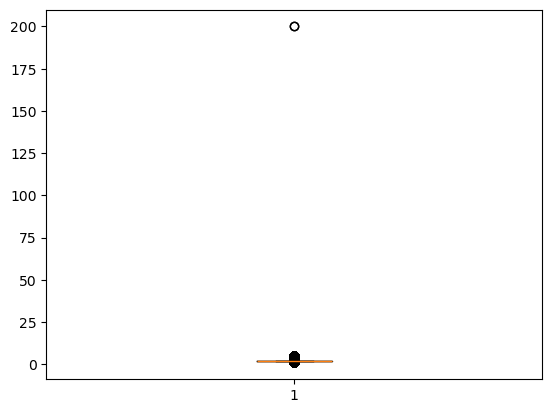

In [376]:
# Visualize outliers using box plots
fig, ax =plt.subplots()
ax.boxplot(transaction_data['PROD_QTY'])
plt.show()

In [377]:
# Let's see if the customer has had other transactions
outlier = transaction_data[transaction_data['LYLTY_CARD_NBR'] == 226000]
outlier

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


---
Further investigation into the `product_quantity` outlier (200 packets) revealed that the associated customer made only two transactions throughout the year, indicating they are not a typical retail consumer. This suggests a potential commercial purchase. To maintain the focus on ordinary retail behavior, we will **exclude this specific loyalty card number from all subsequent analyses**.

In [378]:
# Filter out the customer based on the loyalty card number
transaction_data = transaction_data.loc[transaction_data['LYLTY_CARD_NBR'] != 226000]

In [379]:
# Re‐examine transaction data
transaction_data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246739,246739.000000,2.467390e+05,2.467390e+05,246739.000000,246739.000000,246739.000000
mean,2018-12-30 01:19:29.982856448,135.050474,1.355304e+05,1.351305e+05,56.352259,1.906456,7.316118
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756850e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351820e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030835e+05,2.026525e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.787105,8.071534e+04,7.814774e+04,33.695295,0.342500,2.474901


---
Now, let’s look at the number of transactions over time to see if there are any obvious data issues such as missing data.

In [380]:
# Transactions by date
number_of_transactions = transaction_data.groupby('DATE').size().reset_index(name='Transaction_Count')
number_of_transactions

,DATE,Transaction_Count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


---
There are only 364 rows, meaning only 364 dates had transactions, which indicates a missing date. Let’s see which date is missing and create a chart to visualize the number of transactions over time and identify the missing date.

In [381]:
actual_min = transaction_data['DATE'].min()
actual_max = transaction_data['DATE'].max()

full_dates = pd.DataFrame({'DATE': pd.date_range(start=actual_min, end=actual_max)})

number_of_transactions = transaction_data.groupby('DATE').size().reset_index(name='Transaction_Count')

merged = pd.merge(full_dates, number_of_transactions, on='DATE', how='left')
merged['Transaction_Count'] = merged['Transaction_Count'].fillna(0)

missing_dates = merged[merged['Transaction_Count'] == 0]['DATE']
print("Missing dates:")
print(missing_dates)

number_of_transactions

Missing dates:
177   2018-12-25
Name: DATE, dtype: datetime64[ns]


,DATE,Transaction_Count
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


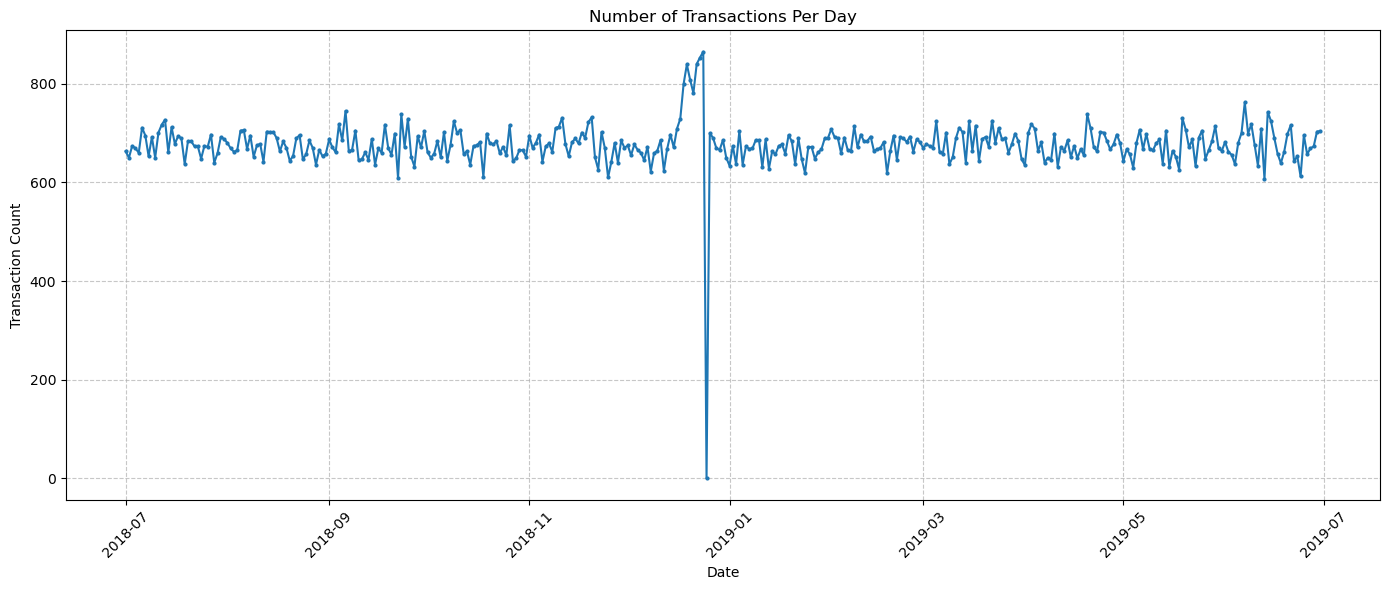

In [382]:
plt.figure(figsize=(14, 6))
plt.plot(merged['DATE'], merged['Transaction_Count'], marker='o', markersize=2, linestyle='-')
plt.title('Number of Transactions Per Day')
plt.xlabel('Date')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


---
The chart displays the **daily number of transactions**, revealing a prominent **surge in purchases during December**, followed by a **sharp decline at the end of the month**. This notable trend will be further examined for deeper insights.

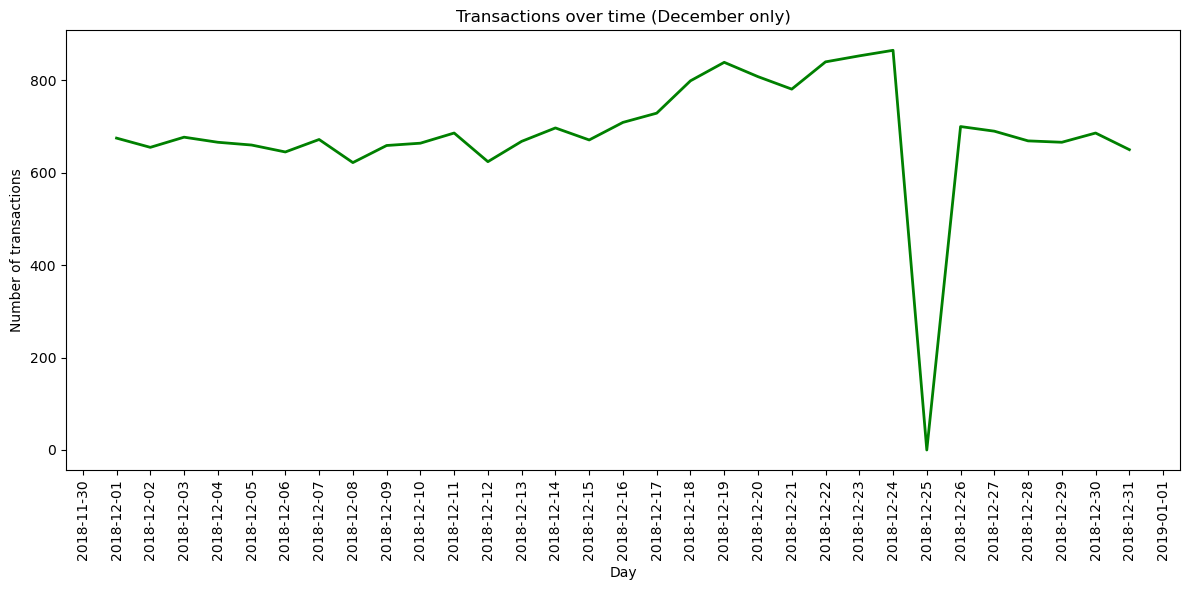

In [383]:
# Extract the month and year from the DATE column
merged['Month'] = merged['DATE'].dt.month
merged['Year'] = merged['DATE'].dt.year

# Step 1: Filter to December
december_data = merged[(merged['Month'] == 12) & (merged['Year'] == 2018)]

# Step 2: Sort by date (for cleaner plotting)
december_data = december_data.sort_values('DATE')

# Step 3: Plot
fig, ax = plt.subplots(figsize=(12, 6))

# Line plot
ax.plot(december_data['DATE'], december_data['Transaction_Count'], color='green', linewidth=2)

# Format x-axis to show daily ticks
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Rotate x-axis labels
plt.xticks(rotation=90, ha='center')

# Labels and title
ax.set_xlabel('Day')
ax.set_ylabel('Number of transactions')
ax.set_title('Transactions over time (December only)')

# Adjust layout
plt.tight_layout()
plt.show()


---
**December Transaction Deep Dive**

Zooming into the December transaction data confirms that the observed sales increase peaks in the **lead-up to Christmas**. As expected, **zero transactions are recorded on Christmas Day (December 25th)**, primarily due to store closures.

Having analyzed transaction patterns, we will now proceed to **feature engineering** by extracting additional attributes, such as `brand` and `packsize`, from the `PROD_NAME` column, starting with `packsize`.

In [384]:
transaction_data = transaction_data.copy()
transaction_data['PACK_SIZE'] = transaction_data['PROD_NAME'].str.extract(r'(\d+)').astype(int)

pack_size_counts = transaction_data['PACK_SIZE'].value_counts().reset_index()
pack_size_counts.columns = ['PACK_SIZE', 'N']
pack_size_counts = pack_size_counts.sort_values(by='PACK_SIZE')

pack_size_counts


,PACK_SIZE,N
17,70,1507
13,90,3008
3,110,22387
19,125,1454
2,134,25102
11,135,3257
1,150,40203
15,160,2970
5,165,15297
4,170,19983


---
The resulting `PACK_SIZE` distribution provides insight into the variety of product sizes available and their prevalence in transactions.

The analysis shows a range of pack sizes from 70g (smallest) to 380g (largest). The distribution of pack sizes highlights the most common and less common product offerings, which is valuable for informing inventory management and future product development strategies.

In [385]:
# Check the output of the first few rows to see if we have picked out packsize.
transaction_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,175
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,170
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150


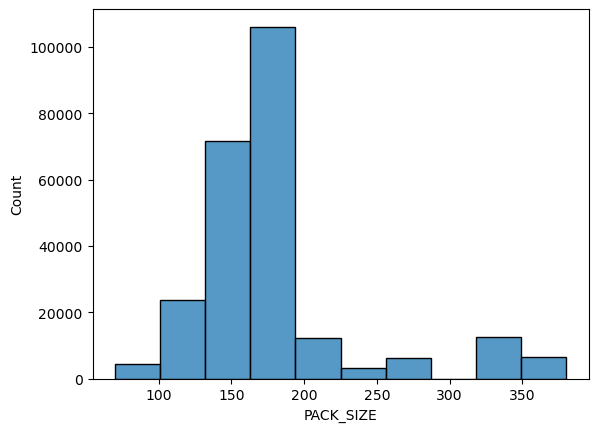

In [386]:
# a histogram of PACK_SIZE
sns.histplot(data = transaction_data, x= transaction_data['PACK_SIZE'], bins= 10)
plt.show()

---
The histogram above visualizes the **distribution of product `PACK_SIZE`**, confirming that the extracted sizes are reasonable. It highlights that the majority of products fall within the 150-200g range, with smaller counts for other sizes, particularly larger ones.

Having validated `PACK_SIZE`, we will now proceed to **extract brand names**. This will be done by taking the first word from the `PROD_NAME` column.

In [387]:
# Extract brand name as everything before the first space
transaction_data['BRAND'] = transaction_data['PROD_NAME'].str.extract(r'^([^\s]+)').squeeze().str.upper()

# Count and sort
brand_counts = transaction_data['BRAND'].value_counts().reset_index()
brand_counts.columns = ['BRAND', 'N']
brand_counts = brand_counts.sort_values(by='N', ascending=False)
brand_counts


,BRAND,N
0,KETTLE,41288
1,SMITHS,27389
2,PRINGLES,25102
3,DORITOS,22041
4,THINS,14075
5,RRD,11894
6,INFUZIONS,11057
7,WW,10320
8,COBS,9693
9,TOSTITOS,9471


 ---
Upon extracting brand names, we identified **inconsistencies and aliases** (e.g., 'RED' and 'RRD' both refer to 'Red Rock Deli').

To ensure accurate brand-level analysis, the below step involves **standardizing these brand names by combining aliases** into a single, unified representation. This data cleaning process is crucial for reliable insights into brand performance.

In [388]:
# Clean brand names
# Clean brand names by using .loc[] to modify the DataFrame directly
transaction_data.loc[:, 'BRAND'] = transaction_data['BRAND'].replace({
    'RED': 'RRD',
    'SNBTS': 'SUNBITES',
    'INFZNS': 'INFUZIONS',
    'WW': 'WOOLWORTHS',
    'SMITH': 'SMITHS',
    'NCC': 'NATURAL',
    'DORITO': 'DORITOS',
    'GRAIN': 'GRNWVES'
})

# Get brand counts
brand_counts = transaction_data['BRAND'].value_counts().reset_index()
brand_counts.columns = ['BRAND', 'N']
brand_counts = brand_counts.sort_values(by='BRAND')

brand_counts


,BRAND,N
18,BURGER,1564
15,CCS,4551
17,CHEETOS,2927
14,CHEEZELS,4603
8,COBS,9693
2,DORITOS,25224
19,FRENCH,1418
11,GRNWVES,7740
5,INFUZIONS,14201
0,KETTLE,41288


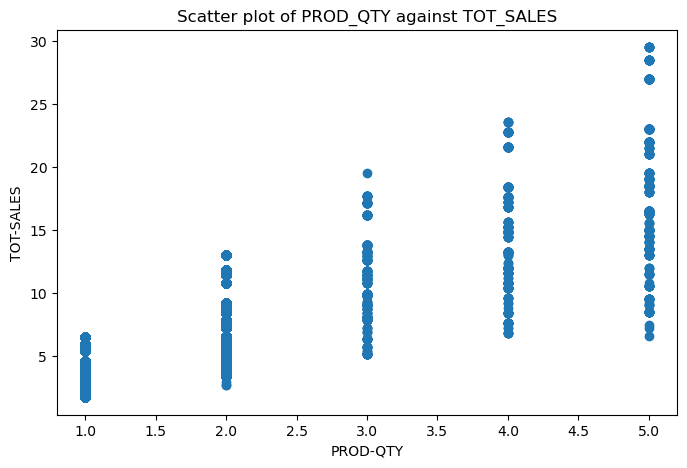

In [389]:
# Scatter plot for PROD_QTY against TOT_SALES
fig, ax = plt.subplots(figsize=(8, 5))
plt.scatter(transaction_data['PROD_QTY'], transaction_data['TOT_SALES'])
plt.title('Scatter plot of PROD_QTY against TOT_SALES')
ax.set_xlabel('PROD-QTY')
ax.set_ylabel('TOT-SALES')
plt.show()

---
**Relationship Between Product Quantity and Total Sales**

This scatter plot visualizes the **relationship between `PROD_QTY` (Product Quantity) and `TOT_SALES` (Total Sales)**. Each point represents a transaction, illustrating how total sales correlate with the number of products purchased in a single transaction. 
The chart indicates a positive relationship, where higher product quantities generally correspond to increased total sales, with distinct clusters forming at each discrete product quantity value.

In [390]:
#join the transaction and customer data sets together.
customer_transaction_data = customer_data.merge(transaction_data, on='LYLTY_CARD_NBR', how='right')
customer_transaction_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL
1,1307,MIDAGE SINGLES/COUPLES,Budget,2019-05-14,1,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCS
2,1343,MIDAGE SINGLES/COUPLES,Budget,2019-05-20,1,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,SMITHS
3,2373,MIDAGE SINGLES/COUPLES,Budget,2018-08-17,2,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,SMITHS
4,2426,MIDAGE SINGLES/COUPLES,Budget,2018-08-18,2,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,KETTLE


In [391]:
#check if some customers were not matched on by checking for nulls.
customer_transaction_data.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
DATE                0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
dtype: int64

---
After merging the transaction and customer datasets, we confirmed that **no null values are present**. This indicates a complete join, ensuring that **every customer record in the transaction data has a corresponding entry in the customer dataset**. This validates the integrity and completeness of our combined data for further analysis.

In [392]:
# save data as csv
customer_transaction_data.to_csv(r'C:\Users\admin\OneDrive\Desktop\Projects\Quantium\cust_trans_data.csv', index=False)

###  DATA ANALYSIS AND INSIGHTS 

**Q. Which product(s) contribute the most to overall total sales?**

TOP 10 PRODUCTS WITH HIGHEST SALES
PROD_NAME
Dorito Corn Chp     Supreme 380g            39052.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Kettle Mozzarella   Basil & Pesto 175g      34457.4
Smiths Crinkle      Original 330g           34302.6
Cheezels Cheese 330g                        34296.9
Doritos Cheese      Supreme 330g            33390.6
Kettle Sweet Chilli And Sour Cream 175g     33031.8
Kettle Original 175g                        32740.2
Kettle Sea Salt     And Vinegar 175g        32589.0
Name: TOT_SALES, dtype: float64


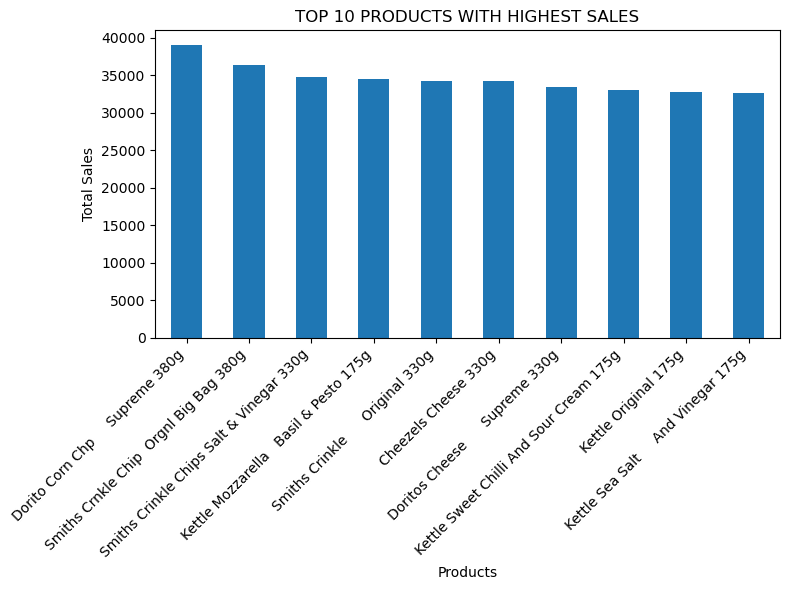

In [393]:
products_total_sales = customer_transaction_data.groupby('PROD_NAME')['TOT_SALES'].sum()
sorted_sales = products_total_sales.sort_values(ascending=False).head(10)
print('TOP 10 PRODUCTS WITH HIGHEST SALES')
print(sorted_sales)

plt.figure(figsize=(8,6))
sorted_sales.plot(kind='bar')
plt.title('TOP 10 PRODUCTS WITH HIGHEST SALES')
plt.xlabel('Products')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

---
The **top 10** products significantly drive overall total sales, demonstrating distinct preferences within the chip category.

* **Dorito Corn Chp Supreme 380g** leads with a remarkable **\$39,052.00** in total sales, positioning it as the highest-contributing product.
* Following closely are **Smiths Crnkle Chip Orgnl Big Bag 380g** at **\$36,367.60** and **Smiths Crinkle Chips Salt & Vinegar 330g** at **\$34,804.20**, highlighting the strong performance of Smiths' larger and flavored varieties.
* **Kettle Mozzarella Basil & Pesto 175g** also performs exceptionally well with **\$34,457.40**, indicating the popularity of premium and unique flavors.
* Other strong performers include **Smiths Crinkle Original 330g** (**\$34,302.60**), **Cheezels Cheese 330g** (**\$34,296.90**), and **Doritos Cheese Supreme 330g** (**\$33,390.60**).
* The remaining top 10 products are dominated by various Kettle flavors, specifically **Kettle Sweet Chilli And Sour Cream 175g** (**\$33,031.80**), **Kettle Original 175g** (**\$32,740.20**), and **Kettle Sea Salt And Vinegar 175g** (**\$32,589.00**).

This breakdown clearly shows a concentrated contribution from a few specific products and brands, with larger pack sizes (330g and 380g) and certain popular flavors (like original, cheese, and salt & vinegar) being key drivers of sales.

**Q. Is there a correlation between the quantity of products sold and total sales?**

In [394]:
correlation_coefficient = customer_transaction_data['PROD_QTY'].corr(customer_transaction_data['TOT_SALES'])
print('Correlation Coefficient between Quantity of Products Sold and Total Sales:', correlation_coefficient)

Correlation Coefficient between Quantity of Products Sold and Total Sales: 0.5382420518271117


---
This correlation suggests that as the quantity of products sold increases, the total sales also tend to increase. In other words, there is a tendency for higher sales when more products are sold.

**Q.Which life stage exhibits the highest sales contribution?**

SALES FOR EACH LIFESTAGE:
LIFESTAGE
OLDER SINGLES/COUPLES     376013.65
RETIREES                  342381.90
OLDER FAMILIES            328519.90
YOUNG FAMILIES            294627.90
YOUNG SINGLES/COUPLES     243756.60
MIDAGE SINGLES/COUPLES    172523.80
NEW FAMILIES               47347.95
Name: TOT_SALES, dtype: float64


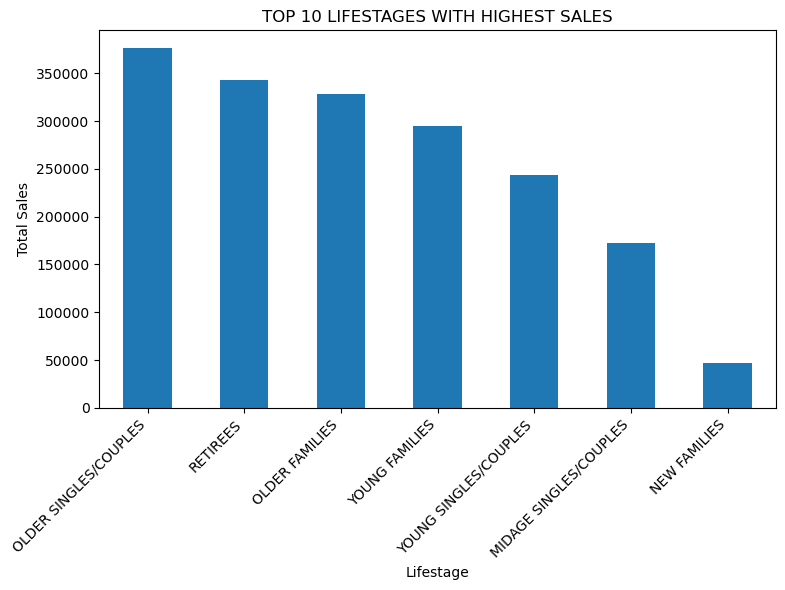

In [395]:
sales_by_lifestages = customer_transaction_data.groupby('LIFESTAGE')['TOT_SALES'].sum()
sorted_sales_by_lifestages = sales_by_lifestages.sort_values(ascending=False).head(10)
print('SALES FOR EACH LIFESTAGE:')
print(sorted_sales_by_lifestages)

plt.figure(figsize=(8,6))
sorted_sales_by_lifestages.plot(kind='bar')
plt.title('TOP 10 LIFESTAGES WITH HIGHEST SALES')
plt.xlabel('Lifestage')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

---
The **'OLDER SINGLES/COUPLES'** life stage stands out as the dominant contributor to total sales, generating a substantial **\$376,013.65**.

This segment is closely followed by **'RETIREES' (\$342,381.90)** and **'OLDER FAMILIES' (\$328,519.90)**, indicating that more mature customer segments collectively account for the largest share of sales.

In contrast, **'NEW FAMILIES'** show a significantly lower sales contribution of just **\$47,347.95**, highlighting a considerable disparity between the highest and lowest performing lifestages. These findings regarding varying sales contributions across lifestages will be **explored further within specific customer segments** to derive more granular insights.

**Q. Which store exhibits the highest sales contribution?**

TOP 10 STORES WITH HIGHEST SALES:
STORE_NBR
226    16544.65
88     15445.85
165    15188.35
237    14830.60
40     14427.30
58     14256.95
199    13975.90
4      13709.25
203    13623.40
26     13597.20
Name: TOT_SALES, dtype: float64


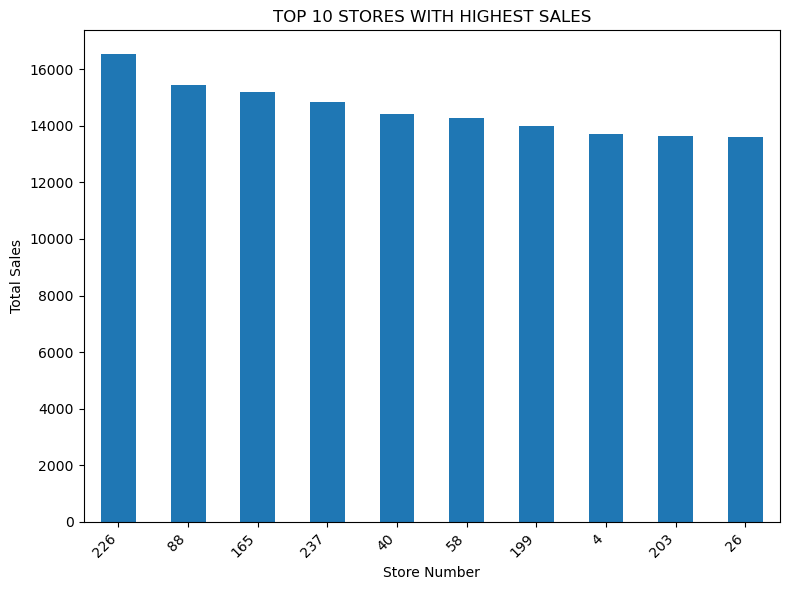

In [396]:
stores_with_highest_sales = customer_transaction_data.groupby('STORE_NBR')['TOT_SALES'].sum()
sorted_store_sales = stores_with_highest_sales.sort_values(ascending=False).head(10)
print('TOP 10 STORES WITH HIGHEST SALES:')
print(sorted_store_sales)


plt.figure(figsize=(8,6))
sorted_store_sales.plot(kind='bar')
plt.title('TOP 10 STORES WITH HIGHEST SALES')
plt.xlabel('Store Number')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

---
Store **226** emerges as the top-performing location, generating a total of **\$16,544.65**. This makes it a critical focal point for understanding success factors.

Following closely, Stores **88** (**\$15,445.85**) and **165** (**\$15,188.35**) solidify a leading cluster of high-revenue generating branches. While Store **226** holds the peak, the consistent performance across the top **10** stores (ranging from **\$16,544.65** down to **\$13,597.20**) suggests a robust network of strong performers.

Identifying these top-tier stores is fundamental for strategic resource allocation and benchmarking best practices. A detailed exploration of their characteristics, customer demographics, and operational efficiencies will be conducted in **Task 2 of the retail strategy analytics** to inform broader business strategies.

**Q. Which customer premium exhibits the highest sales contribution?**

TOTAL SALES FOR PREMIUM CUSTOMERS:
PREMIUM_CUSTOMER
Mainstream    700865.40
Budget        631406.85
Premium       472899.45
Name: TOT_SALES, dtype: float64


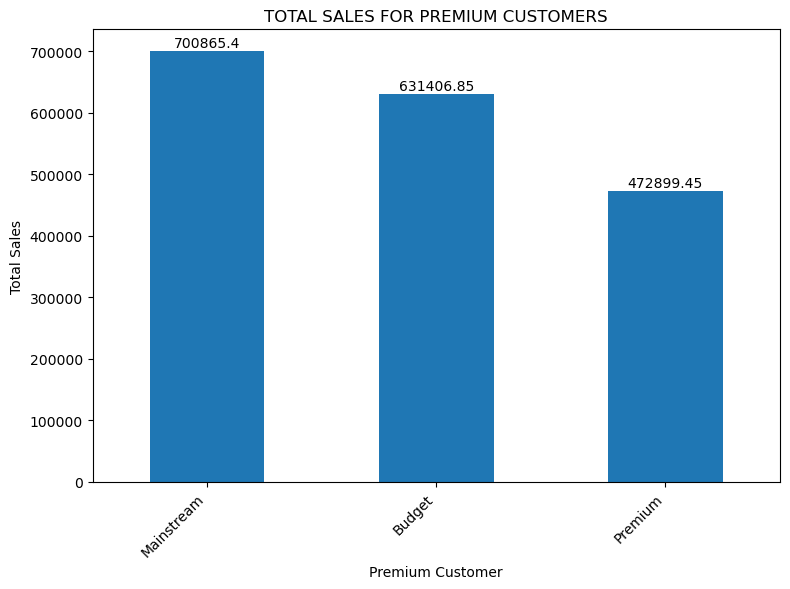

In [397]:
sales_by_premium_customers = customer_transaction_data.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].sum()
sorted_premium_customer_sales = sales_by_premium_customers.sort_values(ascending=False)
print('TOTAL SALES FOR PREMIUM CUSTOMERS:')
print(sorted_premium_customer_sales)

plt.figure(figsize=(8,6))
ax = sorted_premium_customer_sales.plot(kind='bar', color='skyblue')

# Add data labels on top of each bar
for i, v in enumerate(sorted_premium_customer_sales):
    ax.text(i, v + 1000, str(round(v, 2)), ha='center', va='bottom')
sorted_premium_customer_sales.plot(kind='bar')
plt.title('TOTAL SALES FOR PREMIUM CUSTOMERS')
plt.xlabel('Premium Customer')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.show()

---
The **'Mainstream'** customer premium segment exhibits the highest sales contribution, generating a significant **\$700,865.40** in total sales.

This segment significantly outpaces the **'Budget'** segment, which contributed **\$631,406.85**, and the **'Premium'** segment, which generated **\$472,899.45**. This indicates that while all segments contribute, the 'Mainstream' customers are currently the primary drivers of overall sales volume.

These findings will be **explored further within specific customer segments to show individual customer performance within each segment**, allowing for a more granular understanding of purchasing behavior.

### Data analysis on customer segments

**Q. Calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER.**

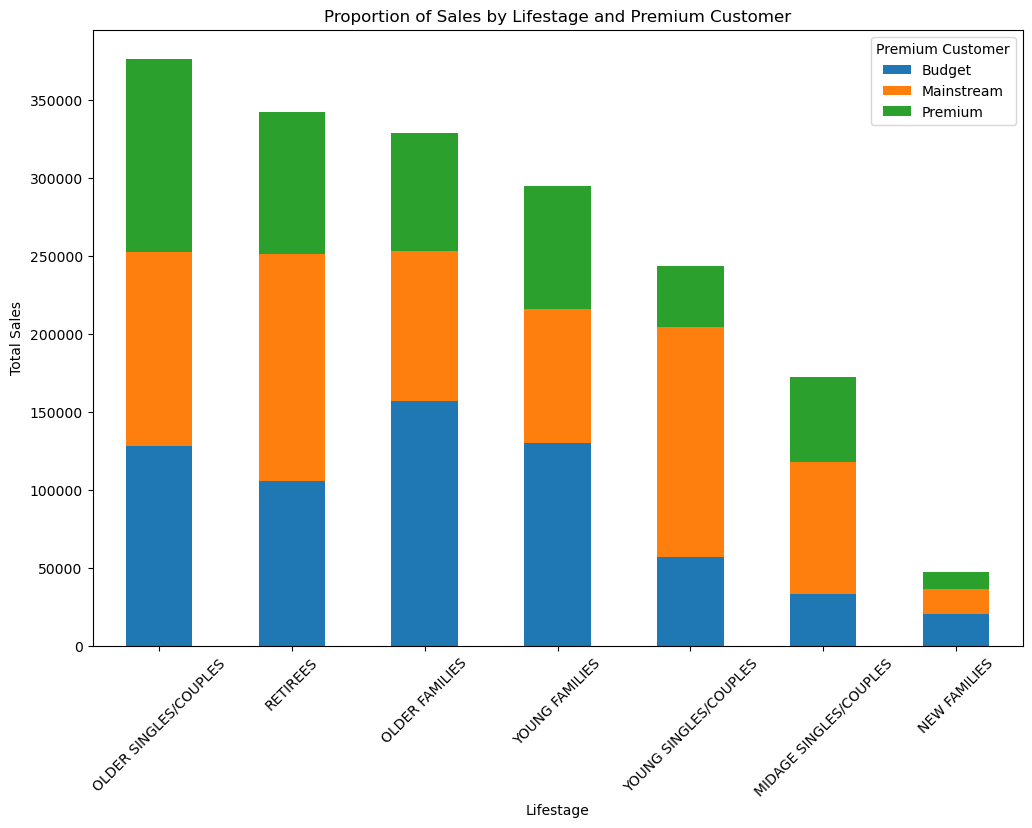

In [398]:
# Summarize the sales data
sales = customer_transaction_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().unstack()

# Calculate total sales for each LIFESTAGE and sort
sales['Total'] = sales.sum(axis=1)
sales = sales.sort_values(by='Total', ascending=False).drop(columns='Total')


# Create a stacked bar plot
sales.plot(kind='bar', stacked=True, figsize=(12, 8))

# Set plot title and labels
plt.title('Proportion of Sales by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.legend(title='Premium Customer')
plt.xticks(rotation=45)

# Show the plot
plt.show()


---
This stacked bar chart provides a critical view of **total sales contributions across various customer lifestages and their premium segments.**

**Key analytical findings:**

* **Dominant Combinations:** Sales are significantly driven by **Budget - Older Families**, **Mainstream - Young Singles/Couples**, and **Mainstream - Retirees**. These specific intersections represent the largest sales volumes, visibly standing out on the chart.
* **Overall Lifestage Impact:** Beyond these specific combinations, **'Older Singles/Couples', 'Retirees',** and **'Older Families'** emerge as the lifestages with the **highest** overall sales contributions.
* **Segment Disparities:** Conversely, **'New Families'** consistently exhibit the **lowest** sales across all premium customer types, signifying a need for targeted understanding or alternative engagement strategies.
* **Premium Customer Trends:** Across nearly all lifestages, the ***'Mainstream' and 'Budget'*** customer segments collectively account for the **vast majority of sales**, while the 'Premium' segment contributes a consistently smaller proportion.

**Q. Are higher sales due to there being more customers who buy chips?**

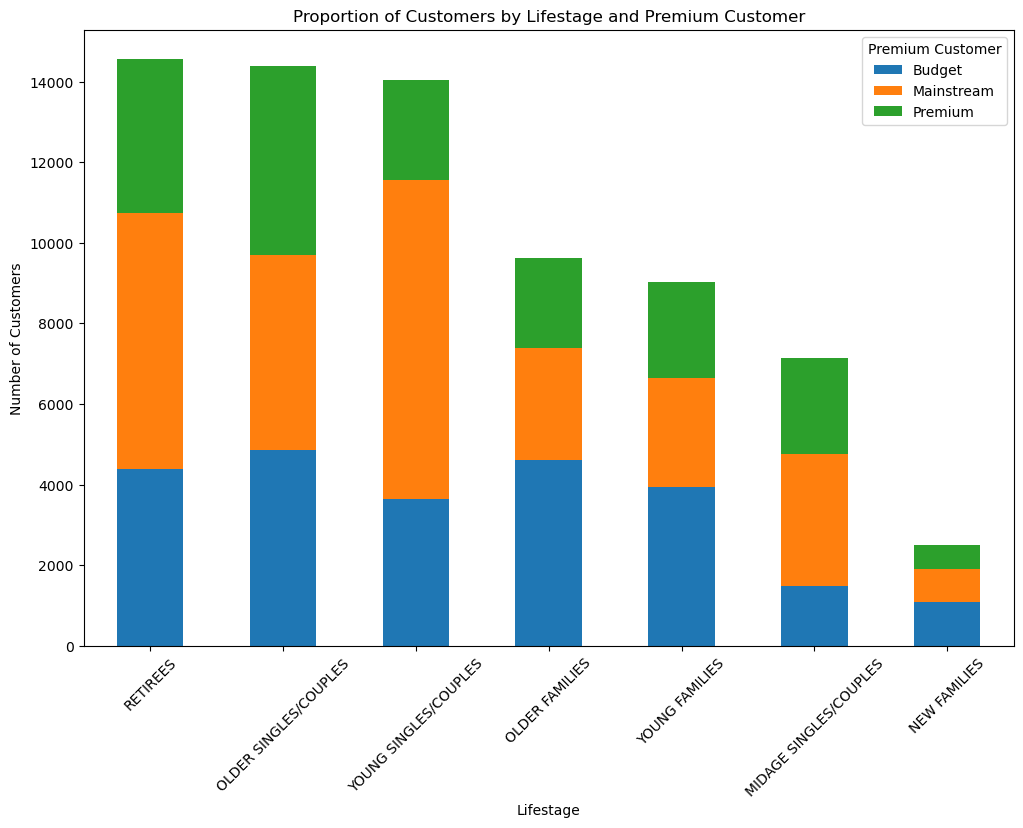

In [399]:
# Filter the number of unique customers
customers = customer_transaction_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().unstack()

# Calculate the total number of customers for each LIFESTAGE
customers['Total'] = customers.sum(axis=1)

# Sort the DataFrame by the total number of customers
customers = customers.sort_values(by='Total', ascending=False).drop(columns='Total')


# Create a stacked bar plot
customers.plot(kind='bar', stacked=True, figsize=(12, 8))

# Set plot title and labels
plt.title('Proportion of Customers by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Number of Customers')
plt.legend(title='Premium Customer')
plt.xticks(rotation=45)

# Show the plot
plt.show()


---
This chart illustrates the **distribution of customers across different lifestages and premium customer segments**, providing crucial context to our sales figures.

**Addressing the question of whether higher sales are solely due to more customers:**

* **For Mainstream Segments:** It is evident that **Mainstream - Young Singles/Couples** and **Mainstream - Retirees** indeed represent a substantial number of customers within their respective lifestages. The higher customer volume in these segments appears to be a direct contributor to their elevated total sales observed previously. This suggests that attracting and retaining a large base of mainstream customers in these lifestages is a key sales driver.

* **For Budget - Older Families:** Interestingly, while **Budget - Older Families** emerged as a top sales contributor, this chart indicates that their **customer count, while significant, is not disproportionately higher** when compared to the number of customers in other leading segments (e.g., Mainstream Retirees or Mainstream Young Singles/Couples). This suggests that the high sales performance of Budget - Older Families is not primarily driven by sheer customer volume. Instead, their higher sales are likely attributable to other factors, such as **customers within this segment purchasing a greater quantity or higher value of chips per transaction.**

**Q. Calculate the average number of units per customer.**

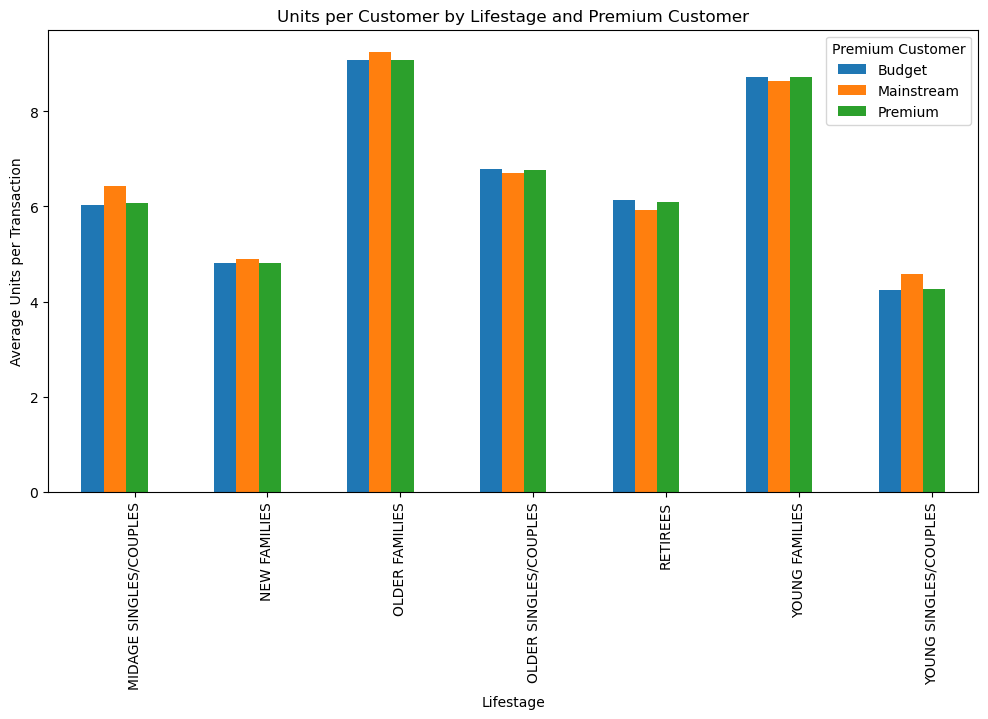

In [400]:
avg_units = customer_transaction_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    AVG=('PROD_QTY', 'sum'),
    CUSTOMERS=('LYLTY_CARD_NBR', 'nunique')
)
avg_units['AVG'] = avg_units['AVG'] / avg_units['CUSTOMERS']
avg_units = avg_units.reset_index().sort_values(by='AVG', ascending=False)

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 6))
avg_units.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='AVG').plot(
    kind='bar', position=0.8, ax=ax
)

# Set plot title and labels
plt.title('Units per Customer by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Average Units per Transaction')
plt.xticks(rotation=90)
plt.legend(title='Premium Customer')

# Show the plot
plt.show()


---
The chart presents the average number of units purchased per customer, segmented by lifestage and premium customer type.

* **Older Families (Budget, Mainstream, Premium)** and **Young Families (Budget, Mainstream, Premium)** segments generally purchase the **highest average number of units per transaction**. This confirms that for the 'Budget - Older Families' segment, their high sales contribution is indeed driven by purchasing more units per transaction, rather than just a higher number of customers.
* **Midage Singles/Couples** also show a relatively high average, around **6-6.5 units** per customer.
* **New Families** and **Young Singles/Couples** tend to purchase the **lowest average number of units per transaction**, typically between **4-5 units** per customer.

This analysis validates the hypothesis that higher sales in certain segments (like ***Budget - Older Families***) are attributable to customers buying more units per transaction, while for others (like ***Mainstream - Young Singles/Couples or Retirees***), both higher customer count and relatively high units per transaction contribute.

**Q. Let’s also investigate the average price per unit chips bought for each customer segment as this is also a driver of total sales.**

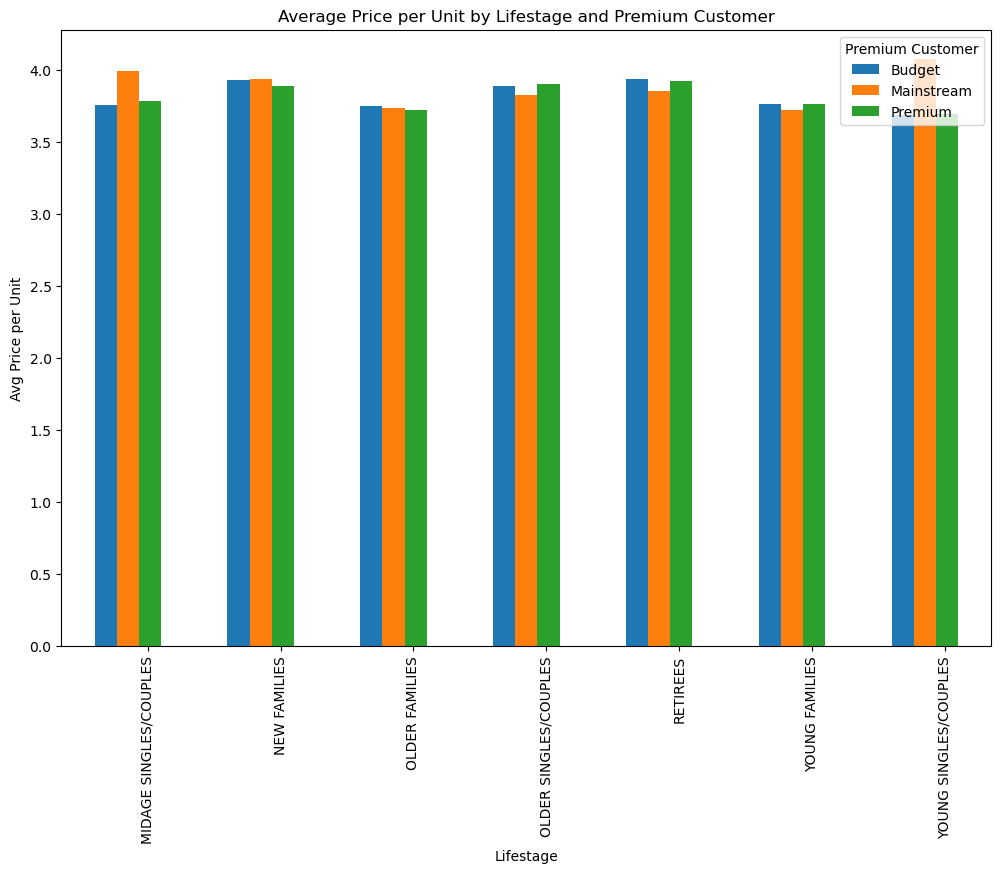

In [401]:
# Calculate the average price per unit
avg_price = customer_transaction_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    AVG=('TOT_SALES', 'sum'),
    TOTAL_QTY=('PROD_QTY', 'sum')
)
avg_price['AVG'] = avg_price['AVG'] / avg_price['TOTAL_QTY']
avg_price = avg_price.reset_index().sort_values(by='AVG', ascending=False)

# Create a bar plot
fig, ax = plt.subplots(figsize=(12, 8))
avg_price.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='AVG').plot(
    kind='bar', position=0.8, ax=ax
)

# Set plot title and labels
plt.title('Average Price per Unit by Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Avg Price per Unit')
plt.xticks(rotation=90)
plt.legend(title='Premium Customer')

# Show the plot
plt.show()


---
This bar chart visualizes the **average price paid per unit of chips across different customer lifestages and premium segments**. This metric is crucial for understanding value perception and its contribution to total sales, complementing insights from volume and customer count.

**Key Analytical Insights:**

* **Mainstream Singles/Couples Drive Highest Unit Price:**

    * Both **Mainstream Midage Singles/Couples** and **Mainstream Young Singles/Couples** exhibit the highest average price per unit, precisely hitting **\$4.00**. This clearly indicates a strong willingness within these specific mainstream customer groups to purchase chips at the higher end of the price spectrum.

* **Nuance in Premium Customer Behavior:**

    * While 'Premium' customers are typically associated with higher spending, this chart reveals that for many lifestages, their **average price per unit for chips is often similar to, or even slightly lower than, their Mainstream or Budget counterparts**.
      
    * This observation strengthens the hypothesis that **Premium customers may prioritize spending on healthier snack alternatives**, and their chip purchases might be predominantly for specific **entertainment purposes or social occasions** rather than regular personal consumption. This aligns with prior observations of generally **fewer Premium Midage and Young Singles/Couples purchasing chips** compared to their mainstream counterparts.


* **Overall Consistency with Minor Variations:** For most other segments (e.g., Retirees, Older Families), the average price per unit remains relatively consistent across all premium customer types, typically hovering around the $3.70 - $3.90 range. Notably, New Families also show a relatively high average price per unit.

**Q. The difference in average price per unit isn’t large, we can check if this difference is statistically different.**

In [402]:
# Calculate the price per unit
customer_transaction_data['price'] = customer_transaction_data['TOT_SALES'] / customer_transaction_data['PROD_QTY']

# Filter the data for the relevant groups
mainstream_prices = customer_transaction_data[(customer_transaction_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))
                                              & (customer_transaction_data['PREMIUM_CUSTOMER'] == 'Mainstream')]['price']
other_prices = customer_transaction_data[(customer_transaction_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))
                                         & (customer_transaction_data['PREMIUM_CUSTOMER'] != 'Mainstream')]['price']

from scipy.stats import ttest_ind
# Perform the t-test
t_stat, p_value = ttest_ind(mainstream_prices, other_prices, alternative='greater')

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')


T-statistic: 37.83196107667815
P-value: 1.11782280577468e-309


---
**Key Insight:**

The extremely low P-value **1.12e-309** (*approaching zero*) provides **statistical evidence** that the **average unit price for Mainstream Young Singles/Couples and Mainstream Midage Singles/Couples is significantly higher** than that for their Budget or Premium counterparts within the same lifestage categories. This difference is not due to random chance.

This statistical validation confirms that these mainstream segments genuinely demonstrate a higher willingness to pay per unit for chips, underscoring their value for targeted pricing and product strategies.

### Deep dive into specific customer segments for insights.
We want to target customer segments that contribute the most to sales to retain them or further increase sales. Let’s look at Mainstream- young singles/couples. Let’s find out if they tend to buy a particular brand of chips.

In [403]:
#Deep dive into Mainstream, young singles/couples
segment1 = customer_transaction_data[(customer_transaction_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (customer_transaction_data['PREMIUM_CUSTOMER']=='Mainstream')]

other = customer_transaction_data[~((customer_transaction_data['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (customer_transaction_data['PREMIUM_CUSTOMER'] == 'Mainstream'))]

# Brand affinity compared to the rest of the population
segment1_quantity = segment1['PROD_QTY'].sum()

other_quantity = other['PROD_QTY'].sum()

# Calculate brand proportions for the segment
segment1_by_brand = segment1.groupby('BRAND')['PROD_QTY'].sum().reset_index().rename(columns={'PROD_QTY' : 'targetsegment'})
segment1_by_brand['targetsegment'] = segment1_by_brand['targetsegment']/ segment1_quantity

# Calculate brand proportions for the rest of the population
other_by_brand = other.groupby('BRAND')['PROD_QTY'].sum().reset_index().rename(columns={'PROD_QTY' : 'other'})
other_by_brand['other'] = other_by_brand['other']/ other_quantity

# Merge and calculate brand affinity
brand_proportions = pd.merge(segment1_by_brand, other_by_brand, on='BRAND', how='inner')
brand_proportions['affinityToBrand'] = brand_proportions['targetsegment'] / brand_proportions['other']

# Sort by affinity in descending order
brand_proportions = brand_proportions.sort_values(by='affinityToBrand', ascending=False)

# Display result
brand_proportions

,BRAND,targetsegment,other,affinityToBrand
18,TYRRELLS,0.031553,0.025693,1.228090
17,TWISTIES,0.046184,0.037877,1.219314
5,DORITOS,0.122761,0.101075,1.214547
9,KETTLE,0.197985,0.165554,1.195891
16,TOSTITOS,0.045411,0.037978,1.195708
11,PRINGLES,0.119420,0.100635,1.186665
4,COBS,0.044638,0.039049,1.143119
8,INFUZIONS,0.064679,0.057065,1.133430
15,THINS,0.060373,0.056987,1.059418
7,GRNWVES,0.032712,0.031188,1.048868


* **Most Likely** Chips Brand to Be Bought **TYRRELLS**

  **Affinity Score: 1.228**

  **Insight:** Mainstream young singles/couples are about 23% more likely to buy TYRRELLS chips compared to the rest of the population. This brand    has the highest affinity, meaning it's the most preferred relative to the broader market.

* **Least** Likely Chips Brand to Be Bought **BURGER**

    **Affinity Score: 0.444**

    **Insight:** Mainstream young singles/couples are about 56% less likely to buy BURGER brand chips compared to the rest of the population. This brand has the lowest affinity, indicating it’s the least favored by this segment.

**Q. Let’s also find out if our target segment tends to buy larger packs of chips.**

In [404]:
# Preferred pack size compared to the rest of the population
segment1_by_pack = segment1.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index().rename(columns={'PROD_QTY' : 'targetsegment'})
segment1_by_pack['targetsegment'] = segment1_by_pack['targetsegment']/ segment1_quantity

other_by_pack = other.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index().rename(columns={'PROD_QTY' : 'other'})
other_by_pack['other'] = other_by_pack['other']/ other_quantity

pack_proportions = pd.merge(segment1_by_pack, other_by_pack, on='PACK_SIZE', how='inner')
pack_proportions['affinityToPack'] = pack_proportions['targetsegment']/ pack_proportions['other']

pack_proportions = pack_proportions.sort_values(by='affinityToPack', ascending=False)

pack_proportions

,PACK_SIZE,targetsegment,other,affinityToPack
17,270,0.031829,0.025096,1.268281
19,380,0.032160,0.025584,1.257024
18,330,0.061284,0.050162,1.221711
4,134,0.119420,0.100635,1.186665
2,110,0.106280,0.089792,1.183632
14,210,0.029124,0.025121,1.159313
5,135,0.014769,0.013075,1.129505
16,250,0.014355,0.012781,1.123161
9,170,0.080773,0.080986,0.997365
6,150,0.157598,0.163421,0.964368


**Pack Size Affinity of Target Segment.**

To determine if our target segment, **Mainstream Young Singles/Couples**, tends to buy larger packs of chips, we analyzed their purchasing affinity for various pack sizes compared to the rest of the population. The `affinityToPack` metric indicates how much more (or less) likely the target segment is to purchase a specific pack size.

**Key Insights:**

* **Higher Affinity for Larger Packs:** Our analysis confirms that the **Mainstream Young Singles/Couples** segment indeed shows a notable preference for certain larger pack sizes.
    * Specifically, they are **27% more likely to purchase a 270g pack** of chips (`affinityToPack` of 1.268).
    * Similarly, they exhibit a higher likelihood of buying **380g packs** (`affinityToPack` of 1.257) and **330g packs** (`affinityToPack` of 1.221). These are among the largest pack sizes available.

* **Lower Affinity for Smaller/Medium Packs:** Conversely, this segment shows a **lower purchasing likelihood for many smaller and medium-sized packs** (e.g., 70g, 90g, 150g, 160g, 175g, 180g, 190g, 200g, 220g), where their `affinityToPack` values are consistently below 1.0.

In conclusion, the **Mainstream Young Singles/Couples** segment demonstrably tends to buy larger packs of chips (particularly 270g, 380g, and 330g) more often than the general population, making these pack sizes crucial for their product offerings.

**Q. What brands sell this 270g pack size?**

In [405]:
# Brand
pack_270g = customer_transaction_data[customer_transaction_data['PACK_SIZE']== 270]
pack_270g['BRAND'].unique()

array(['TWISTIES'], dtype=object)

In [406]:
# Brand and product
customer_transaction_data.loc[customer_transaction_data['PACK_SIZE']==270, 'PROD_NAME'].unique()

array(['Twisties Cheese     270g', 'Twisties Chicken270g'], dtype=object)

---
To understand the brands contributing to the 270g pack size affinity, we filtered the dataset for `PACK_SIZE == 270`.

**Key Finding:**

The analysis definitively shows that **Twisties is the sole brand offering chips in the 270g pack size**, specifically with 'Twisties Cheese 270g' and 'Twisties Chicken270g' products.

**Insight:**

Given that Twisties is the exclusive provider of the 270g pack, the previously observed higher purchasing likelihood of 270g packs by the Mainstream Young Singles/Couples segment may not indicate a general preference for the 270g pack size across all brands. Instead, this strong affinity is more likely a reflection of a **higher likelihood of purchasing the Twisties brand itself** within this target segment. This distinction is critical for strategy, suggesting that the segment's preference might be brand-driven rather than purely pack-size driven for this particular format.